### DATASET DESCRIPTION


This dataset consists of a group of breast cancer patients, who had surgery to remove their tumour. The dataset consists of the following variables:

Patient_ID: unique identifier id of a patient

Age: age at diagnosis (Years)

Gender: Male/Female

Protein1, Protein2, Protein3, Protein4: expression levels (undefined units)

Tumour_Stage: I, II, III

Histology: Infiltrating Ductal Carcinoma, Infiltrating Lobular Carcinoma, Mucinous Carcinoma(description of a tumour based on how abnormal the cancer cells and tissue look under a microscope and how quickly cancer can grow and spread)

ER status: Positive/Negative

PR status: Positive/Negative

HER2 status: Positive/Negative

Surgery_type: Lumpectomy, Simple Mastectomy, Modified Radical Mastectomy, Other

DateofSurgery: Date on which surgery was performed (in DD-MON-YY)

DateofLast_Visit: Date of last visit (in DD-MON-YY) [can be null, in case the patient didn’t visited again after the surgery]

Patient_Status: Alive/Dead [can be null, in case the patient didn’t visited again after the surgery and there is no information available whether the patient is alive or dead].

### Task: 

create a prediction model to determine the survival chances of an individual diagnosed with breast cancer

#### Data source:

Kaggle datasets: https://www.kaggle.com/datasets/amandam1/breastcancerdataset


In [1]:
# import dataset 
import pandas as pd

df = pd.read_csv("./BRCA.csv")
print(df.shape)
df.head()

(341, 16)


,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


the dataset consist of 341 entries and 16 columns

In [2]:
# check for null values
df.isna().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

proceed by dropping the null values

In [3]:
df1 = df.dropna()

In [4]:
df1.isna().sum()

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    float64
 2   Gender              317 non-null    object 
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER status           317 non-null    object 
 10  PR status           317 non-null    object 
 11  HER2 status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float

some explolatory data analysis and data visualizations

In [6]:
# looking at the most affected gender

df1.Gender.value_counts()

FEMALE    313
MALE        4
Name: Gender, dtype: int64

females are the most affected

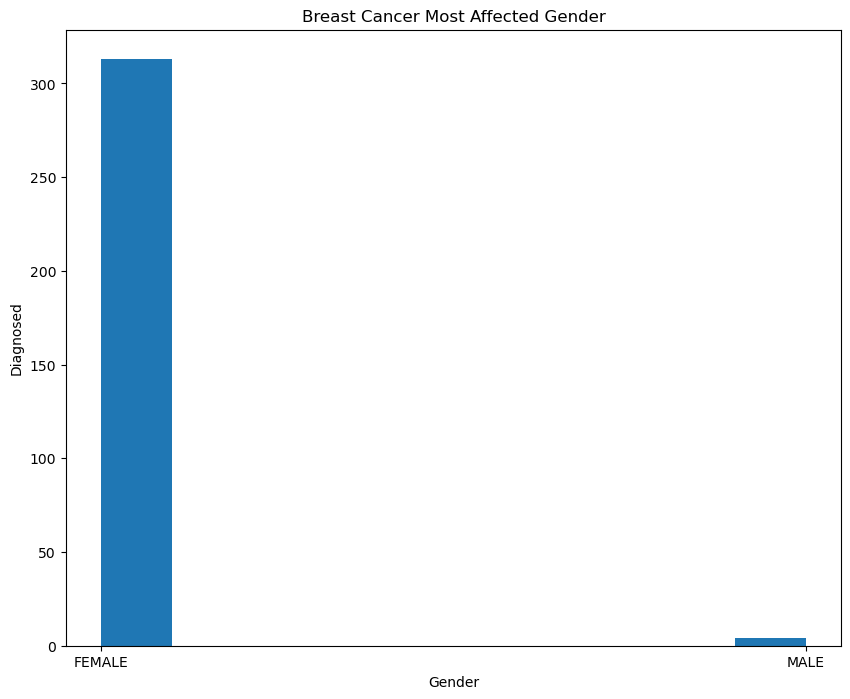

In [7]:
# visualize this
# using a histogram

import plotly.express as px
import matplotlib.pyplot as plt



plt.rcParams["figure.figsize"] = (10,8)

plt.xlabel("Gender")
plt.ylabel("Diagnosed")
plt.title("Breast Cancer Most Affected Gender")
plt.hist(df1.Gender)
plt.show()

In [8]:
df1.columns

Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

look at the stage of tumors for patients

In [9]:
df1.Tumour_Stage.unique()

array(['III', 'II', 'I'], dtype=object)

start with a histogram

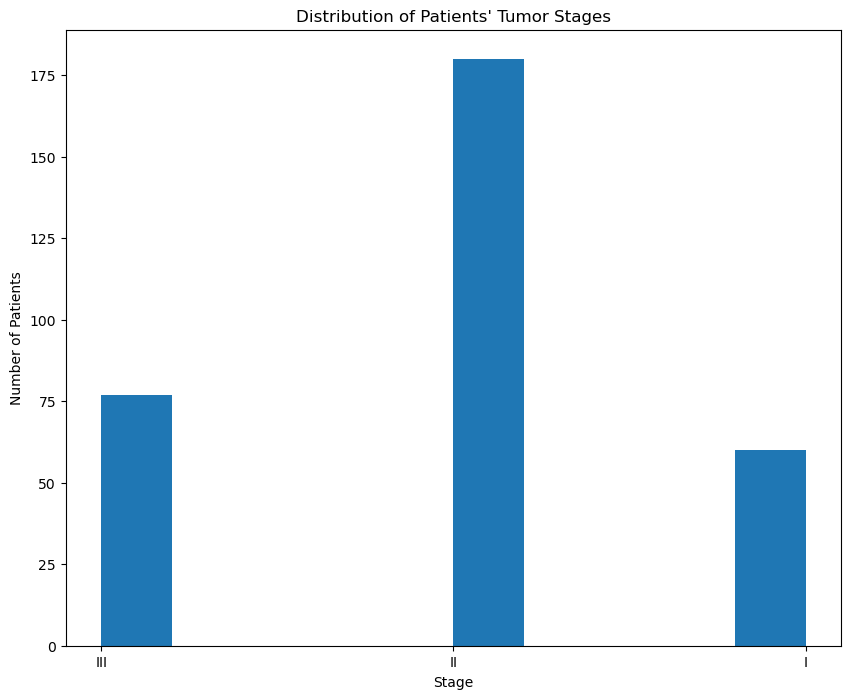

In [10]:
plt.rcParams["figure.figsize"] = (10,8)

plt.xlabel("Stage")
plt.ylabel("Number of Patients")
plt.title("Distribution of Patients' Tumor Stages")
plt.hist(df1.Tumour_Stage)
plt.show()

most patients are in the second stage

In [11]:
# a pie chart 
stage = df1.Tumour_Stage.value_counts()
name = stage.index
value = stage.values

figure = px.pie(df1, values= value, names= name, hole= 0, title= "Distribution of Patients' Tumor Stages")
figure.show()

Heve a look at histology of patients

In [12]:
df1.Histology.unique()

array(['Infiltrating Ductal Carcinoma', 'Mucinous Carcinoma',
       'Infiltrating Lobular Carcinoma'], dtype=object)

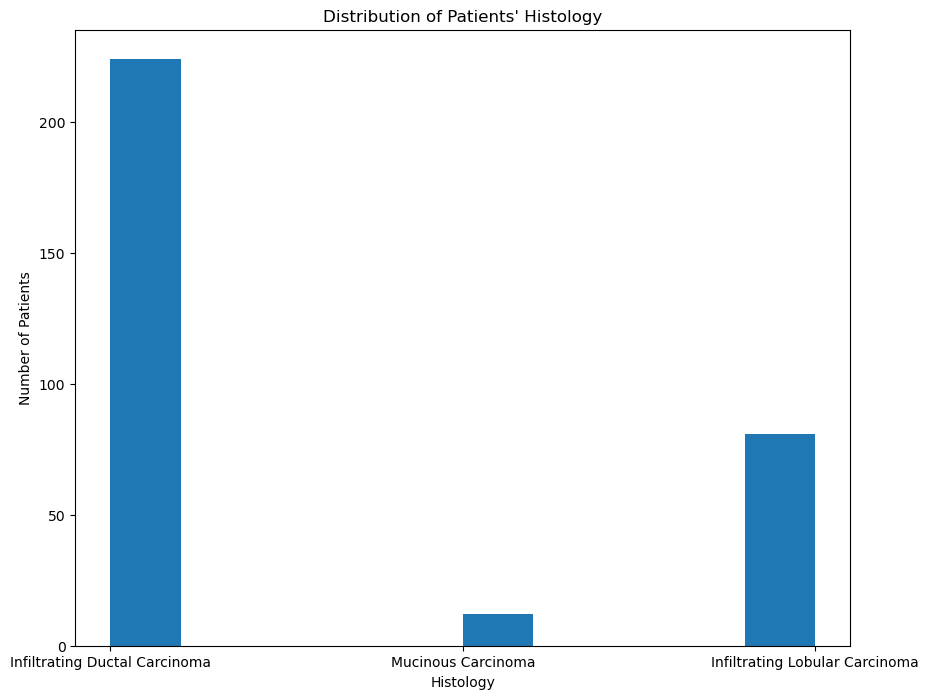

In [13]:
plt.rcParams["figure.figsize"] = (10,8)

plt.xlabel("Histology")
plt.ylabel("Number of Patients")
plt.title("Distribution of Patients' Histology")
plt.hist(df1.Histology)
plt.show()

most patiemts in Infiltrating Ductal Carcinoma stage


In [14]:
# a pie chart
histology = df1.Histology.value_counts()
name = histology.index
value = histology.values

figure = px.pie(df1, values= value, names= name, hole= 0, title= "Distribution of Patients' Histology")
figure.show()

looking at ER status, PR, HER2 status

In [15]:
df1["ER status"].value_counts()

Positive    317
Name: ER status, dtype: int64

In [16]:
df1["PR status"].value_counts()

Positive    317
Name: PR status, dtype: int64

In [17]:
df1["HER2 status"].value_counts()

Negative    288
Positive     29
Name: HER2 status, dtype: int64

type of surgeries done

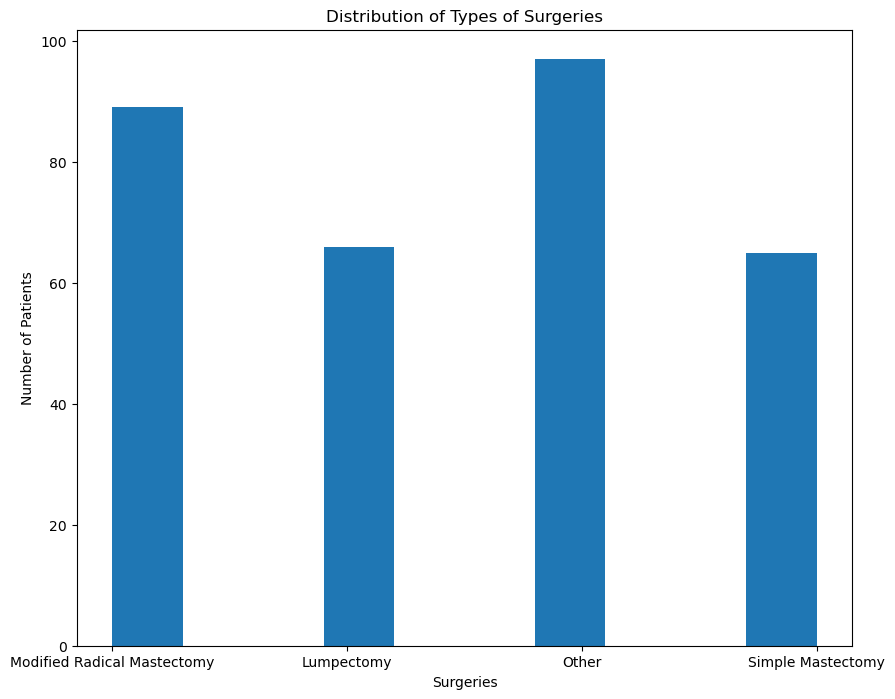

In [18]:
plt.rcParams["figure.figsize"] = (10,8)

plt.xlabel("Surgeries")
plt.ylabel("Number of Patients")
plt.title("Distribution of Types of Surgeries")
plt.hist(df1.Surgery_type)
plt.show()

In [19]:
# a pie chart
surgery = df1.Surgery_type.value_counts()
name = surgery.index
value = surgery.values

figure = px.pie(df1, values= value, names= name, hole= 0, title= "Distribution of Patients' Histology")
figure.show()

view unique values of each column

In [20]:
def print_unique(df):
    for column in df:
        print(f'{column}: {df[column].unique()}')

print_unique(df1)

Patient_ID: ['TCGA-D8-A1XD' 'TCGA-EW-A1OX' 'TCGA-A8-A079' 'TCGA-D8-A1XR'
 'TCGA-BH-A0BF' 'TCGA-AO-A1KQ' 'TCGA-D8-A73X' 'TCGA-EW-A1P5'
 'TCGA-A8-A09A' 'TCGA-S3-A6ZG' 'TCGA-BH-A0EA' 'TCGA-AC-A8OR'
 'TCGA-A2-A0ES' 'TCGA-C8-A8HQ' 'TCGA-AO-A03V' 'TCGA-A2-A0D4'
 'TCGA-EW-A1PA' 'TCGA-BH-A0DE' 'TCGA-E2-A1B4' 'TCGA-AC-A3HN'
 'TCGA-A8-A095' 'TCGA-A2-A4S0' 'TCGA-A7-A3J0' 'TCGA-AC-A62Y'
 'TCGA-A7-A5ZW' 'TCGA-A2-A25C' 'TCGA-D8-A1JC' 'TCGA-A7-A4SB'
 'TCGA-AR-A24S' 'TCGA-D8-A4Z1' 'TCGA-A7-A26J' 'TCGA-AC-A5XS'
 'TCGA-OL-A6VR' 'TCGA-EW-A1PF' 'TCGA-LL-A7SZ' 'TCGA-BH-A18K'
 'TCGA-AC-A3OD' 'TCGA-BH-A8FY' 'TCGA-C8-A26Z' 'TCGA-A2-A1G4'
 'TCGA-BH-A18F' 'TCGA-E2-A1IG' 'TCGA-AC-A2B8' 'TCGA-BH-A0BT'
 'TCGA-AO-A125' 'TCGA-A8-A07E' 'TCGA-A8-A08A' 'TCGA-A2-A0EX'
 'TCGA-A8-A093' 'TCGA-E2-A1L6' 'TCGA-3C-AAAU' 'TCGA-E2-A1IL'
 'TCGA-A2-A0CO' 'TCGA-BH-A0E7' 'TCGA-EW-A6SC' 'TCGA-D8-A1X7'
 'TCGA-D8-A1XM' 'TCGA-A1-A0SF' 'TCGA-EW-A1J5' 'TCGA-BH-A0AY'
 'TCGA-E2-A15G' 'TCGA-A8-A09B' 'TCGA-BH-A0HF' 'TCGA-BH-A0GY'
 'TCGA-BH-A0

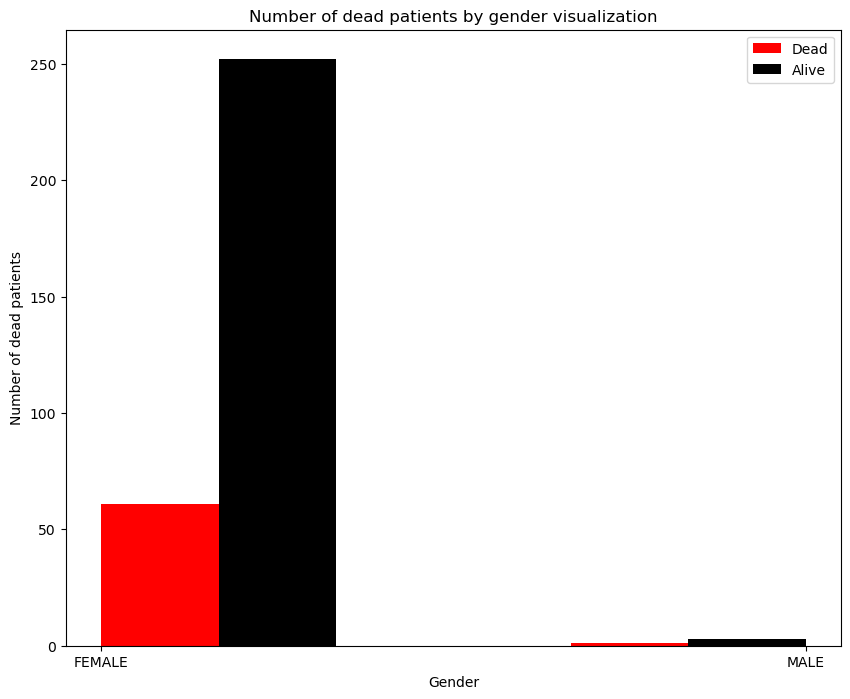

In [21]:
dead = df1[df1.Patient_Status == "Dead"].Gender
alive = df1[df1.Patient_Status == "Alive"].Gender

plt.rcParams["figure.figsize"] = (10,8)
plt.xlabel("Gender")
plt.ylabel("Number of dead patients")
plt.title("Number of dead patients by gender visualization")
plt.hist([dead, alive], color= ["red", "black"], label= ["Dead", "Alive"], bins= 3, rwidth= 2.0)
plt.legend()

In [22]:
df1.columns

Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

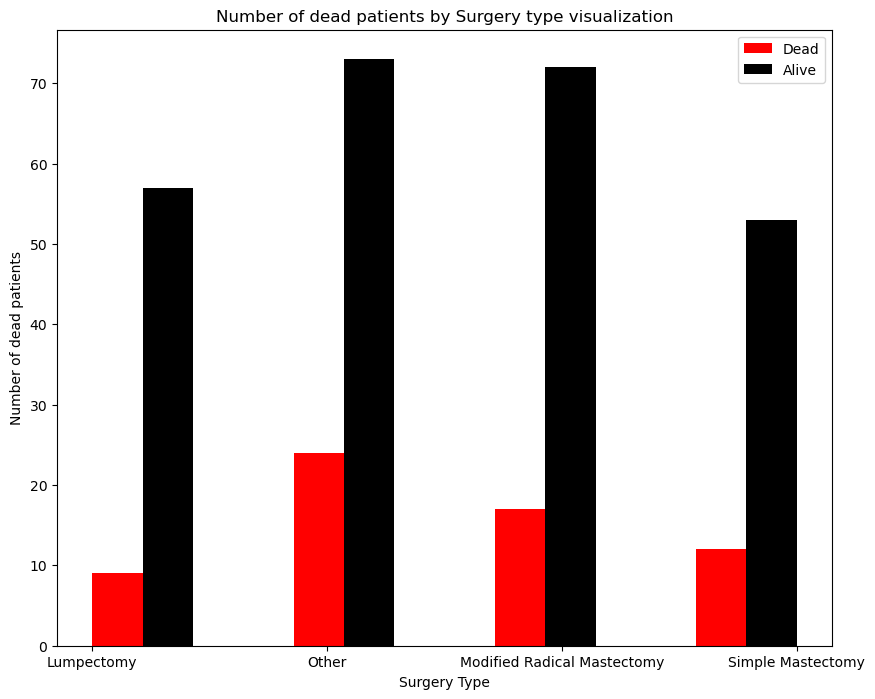

In [23]:
# distribution of surgery types and death or survival
dead_sur =  df1[df1.Patient_Status == "Dead"].Surgery_type
alive_sur = df1[df1.Patient_Status == "Alive"].Surgery_type

plt.rcParams["figure.figsize"] = (10,8)
plt.xlabel("Surgery Type")
plt.ylabel("Number of dead patients")
plt.title("Number of dead patients by Surgery type visualization")
plt.hist([dead_sur, alive_sur], color= ["red", "black"], label= ["Dead", "Alive"], bins= 7, rwidth= 2.0)
plt.legend()

# Model Building

In [24]:
# print unique values of object dtye
def print_object(df):
    for column in df:
        if df[column].dtype == "object":
            print(f'{column}: {df[column].unique()}')

print_object(df1)

Patient_ID: ['TCGA-D8-A1XD' 'TCGA-EW-A1OX' 'TCGA-A8-A079' 'TCGA-D8-A1XR'
 'TCGA-BH-A0BF' 'TCGA-AO-A1KQ' 'TCGA-D8-A73X' 'TCGA-EW-A1P5'
 'TCGA-A8-A09A' 'TCGA-S3-A6ZG' 'TCGA-BH-A0EA' 'TCGA-AC-A8OR'
 'TCGA-A2-A0ES' 'TCGA-C8-A8HQ' 'TCGA-AO-A03V' 'TCGA-A2-A0D4'
 'TCGA-EW-A1PA' 'TCGA-BH-A0DE' 'TCGA-E2-A1B4' 'TCGA-AC-A3HN'
 'TCGA-A8-A095' 'TCGA-A2-A4S0' 'TCGA-A7-A3J0' 'TCGA-AC-A62Y'
 'TCGA-A7-A5ZW' 'TCGA-A2-A25C' 'TCGA-D8-A1JC' 'TCGA-A7-A4SB'
 'TCGA-AR-A24S' 'TCGA-D8-A4Z1' 'TCGA-A7-A26J' 'TCGA-AC-A5XS'
 'TCGA-OL-A6VR' 'TCGA-EW-A1PF' 'TCGA-LL-A7SZ' 'TCGA-BH-A18K'
 'TCGA-AC-A3OD' 'TCGA-BH-A8FY' 'TCGA-C8-A26Z' 'TCGA-A2-A1G4'
 'TCGA-BH-A18F' 'TCGA-E2-A1IG' 'TCGA-AC-A2B8' 'TCGA-BH-A0BT'
 'TCGA-AO-A125' 'TCGA-A8-A07E' 'TCGA-A8-A08A' 'TCGA-A2-A0EX'
 'TCGA-A8-A093' 'TCGA-E2-A1L6' 'TCGA-3C-AAAU' 'TCGA-E2-A1IL'
 'TCGA-A2-A0CO' 'TCGA-BH-A0E7' 'TCGA-EW-A6SC' 'TCGA-D8-A1X7'
 'TCGA-D8-A1XM' 'TCGA-A1-A0SF' 'TCGA-EW-A1J5' 'TCGA-BH-A0AY'
 'TCGA-E2-A15G' 'TCGA-A8-A09B' 'TCGA-BH-A0HF' 'TCGA-BH-A0GY'
 'TCGA-BH-A0

In [25]:
df1.columns

Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [26]:
# drop unneeded columns
df2 = df1.drop(["Patient_ID", "Date_of_Surgery", "Date_of_Last_Visit"], axis= 1)
print(df2.shape)
print(df2.columns)
df2.head()

(317, 13)
Index(['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
       'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status',
       'Surgery_type', 'Patient_Status'],
      dtype='object')


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Dead


In [27]:
df2.columns

Index(['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
       'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status',
       'Surgery_type', 'Patient_Status'],
      dtype='object')

In [28]:
df2.dtypes


Age               float64
Gender             object
Protein1          float64
Protein2          float64
Protein3          float64
Protein4          float64
Tumour_Stage       object
Histology          object
ER status          object
PR status          object
HER2 status        object
Surgery_type       object
Patient_Status     object
dtype: object

In [29]:
# label encodeing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


# # define class for label encoding
# columns = ["Gender", "Tumour_Stage", "ER status", "PR status", "HER2 status", "Surgery_type", "Patient_Status"]

# class MultiColumnLabelEncoder:
#     def __init__(self,columns = None):
#         self.columns = columns # array of column names to encode

#     def fit(self,X,y=None):
#         return self # not relevant here

#     def transform(self,X):
#         '''
#         Transforms columns of X specified in self.columns using
#         LabelEncoder(). If no columns specified, transforms all
#         columns in X.
#         '''
#         output = X.copy()
#         if self.columns is not None:
#             for col in self.columns:
#                 output[col] = LabelEncoder().fit_transform(output[col])
#         else:
#             for colname,col in output.iteritems():
#                 output[colname] = LabelEncoder().fit_transform(col)
#         return output

#     def fit_transform(self,X,y=None):
#         return self.fit(X,y).transform(X)


In [30]:
df3 = df2.copy()
df3.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Dead


In [31]:
df3.columns

Index(['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
       'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status',
       'Surgery_type', 'Patient_Status'],
      dtype='object')

In [32]:
len(df1.columns)

16

In [33]:
len(df3.columns)

13

In [34]:
df3["Tumour_Stage"] = df3["Tumour_Stage"].map({"I": 1, "II": 2, "III": 3})
df3["Histology"] = df3["Histology"].map({"Infiltrating Ductal Carcinoma": 1, 
                                           "Infiltrating Lobular Carcinoma": 2, "Mucinous Carcinoma": 3})
df3["ER status"] = df3["ER status"].map({"Positive": 1, "Negative": 2})
df3["PR status"] = df3["PR status"].map({"Positive": 1, "Negative": 2})
df3["HER2 status"] = df3["HER2 status"].map({"Positive": 1, "Negative": 2})
df3["Gender"] = df3["Gender"].map({"MALE": 0, "FEMALE": 1})
df3["Surgery_type"] = df3["Surgery_type"].map({"Other": 1, "Modified Radical Mastectomy": 2, 
                                                 "Lumpectomy": 3, "Simple Mastectomy": 4})
df3["Patient_Status"] = df3["Patient_Status"].map({"Alive": 1, "Dead": 2})

In [35]:
df3.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,36.0,1,0.080353,0.42638,0.54715,0.273680,3,1,1,1,2,2,1
1,43.0,1,-0.420320,0.57807,0.61447,-0.031505,2,3,1,1,2,3,2
2,69.0,1,0.213980,1.31140,-0.32747,-0.234260,3,1,1,1,2,1,1
3,56.0,1,0.345090,-0.21147,-0.19304,0.124270,2,1,1,1,2,2,1
4,56.0,1,0.221550,1.90680,0.52045,-0.311990,2,1,1,1,2,1,2


In [36]:
df2.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Dead


In [37]:
print_unique(df3)

Age: [36. 43. 69. 56. 84. 53. 77. 40. 71. 72. 75. 52. 41. 37. 59. 62. 74. 87.
 45. 79. 47. 50. 61. 68. 49. 48. 46. 81. 89. 44. 55. 78. 85. 60. 57. 54.
 76. 58. 67. 63. 82. 65. 73. 51. 83. 80. 39. 66. 42. 38. 64. 29. 32. 70.
 90. 35. 88.]
Gender: [1 0]
Protein1: [ 8.0353e-02 -4.2032e-01  2.1398e-01  3.4509e-01  2.2155e-01 -8.1872e-02
 -6.9535e-02 -1.5175e-01 -5.6570e-01 -2.2305e-01 -3.7270e-01  1.7164e-01
 -1.6828e+00  5.6042e-01  1.4252e-01  2.9490e-01  1.9762e-01  1.0464e-01
 -2.4613e-01 -8.7485e-02 -5.9518e-01 -2.9870e-01  5.4240e-01 -3.6229e-02
  3.3186e-01 -6.2153e-02 -3.3045e-01  1.0352e+00 -2.2788e-01  6.4903e-01
 -2.8082e-01  5.9453e-01  2.3235e-01 -7.9765e-02  6.1643e-02 -5.5214e-01
 -3.4962e-01  7.0876e-01  2.8025e-01 -9.4840e-01  2.1728e-01  4.2538e-01
  1.4991e-01 -2.2853e-01 -4.2298e-01  8.2374e-01 -2.4978e-01  2.3113e-01
 -1.4872e+00  2.3917e-01 -6.6342e-01  2.0973e-01  7.4520e-01  7.2984e-01
  2.1197e-01  5.1178e-01  0.0000e+00 -2.8272e-01  3.5914e-01  6.7627e-02
  4.3546

In [38]:
df3.describe()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.0,317.0,317.000000,317.000000,317.000000
mean,58.725552,0.987382,-0.027232,0.949557,-0.095104,0.006713,2.053628,1.331230,1.0,1.0,1.908517,2.312303,1.195584
std,12.827374,0.111797,0.543858,0.906153,0.589027,0.625965,0.656246,0.546047,0.0,0.0,0.288750,1.113897,0.397276
min,29.000000,0.000000,-2.144600,-0.978730,-1.627400,-2.025500,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000
25%,49.000000,1.000000,-0.350600,0.368840,-0.531360,-0.382240,2.000000,1.000000,1.0,1.0,2.000000,1.000000,1.000000
50%,58.000000,1.000000,0.005649,0.997130,-0.193040,0.038522,2.000000,1.000000,1.0,1.0,2.000000,2.000000,1.000000
75%,67.000000,1.000000,0.336260,1.612000,0.251210,0.436250,2.000000,2.000000,1.0,1.0,2.000000,3.000000,1.000000
max,90.000000,1.000000,1.593600,3.402200,2.193400,1.629900,3.000000,3.000000,1.0,1.0,2.000000,4.000000,2.000000


define X and y

In [81]:
X = np.array(df3.drop("Patient_Status", axis= 1))
y = np.array(df3.Patient_Status)

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 10)

In [84]:
X_test[:5]

array([[ 6.0000e+01,  1.0000e+00,  9.4585e-02,  1.0003e+00, -2.2575e-01,
         4.8602e-02,  3.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,
         2.0000e+00,  4.0000e+00],
       [ 6.4000e+01,  1.0000e+00, -2.4408e-01,  1.6907e+00, -1.2854e-01,
        -1.3402e+00,  2.0000e+00,  2.0000e+00,  1.0000e+00,  1.0000e+00,
         2.0000e+00,  2.0000e+00],
       [ 4.5000e+01,  1.0000e+00, -7.1163e-01,  1.6924e+00, -8.0076e-01,
         7.9440e-01,  2.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,
         2.0000e+00,  4.0000e+00],
       [ 5.0000e+01,  1.0000e+00,  3.3653e-01,  6.5020e-01, -7.7196e-01,
         4.1034e-01,  3.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,
         2.0000e+00,  1.0000e+00],
       [ 7.4000e+01,  1.0000e+00, -3.1640e-02,  2.2806e+00,  8.5752e-03,
        -5.3801e-01,  1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,
         2.0000e+00,  3.0000e+00]])

In [85]:
y_test[:5]

array([2, 1, 1, 2, 1], dtype=int64)

In [86]:
import warnings
warnings.filterwarnings("ignore")

In [87]:
import numpy as np
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [88]:
def find_best_model_using_gridsearchcv(X_train, y_train):
    algos = {
    'linear_regression': {
        'model': LinearRegression(),
        'params': {
            'normalize': [True, False]
        }
    },
    'lasso': {
        'model': Lasso(),
        'params':{
            'alpha': [1,2],
            'selection': ['random', 'cyclic']
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['mse', 'friedman_mse'],
            'splitter': ['best', 'random']
            }
        },
    'XGBoost': {
          'model': XGBClassifier(),
          'params': {
              'min_child_weight': [1, 5, 10],
              'gamma': [0.5, 1],
              'subsample': [0.6, 0.8, 1.0],
              'max_depth': [3, 5]
            }
       },
       'LogisticRegression' : {
           'model' : LogisticRegression(),
           'params': {
               'penalty' : ['l1', 'l2'],
               'C' : np.logspace(-4, 4, 20),
               'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
           }
       },
       'RandomForestClassifier' : {
           'model' : RandomForestClassifier(),
           'params' : {
               'n_estimators' : list(range(10,101,10)),
               'max_features' : ['auto', 'sqrt', 'log2']
           }
       }

    }


    scores = []
    cv = ShuffleSplit(n_splits= 5, test_size= 0.2, random_state= 0)
    # for loop
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv= cv, return_train_score= False)
        gs.fit(X_train, y_train)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns= ['model', 'best_score', 'best_params'])

In [89]:
find_best_model_using_gridsearchcv(X_train, y_train)

[16:13:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:17] WARNING:

,model,best_score,best_params
0,linear_regression,-2.159164,{'normalize': True}
1,lasso,-0.014235,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,-0.723980,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
3,XGBoost,0.784314,"{'gamma': 0.5, 'max_depth': 5, 'min_child_weig..."
4,LogisticRegression,0.776471,"{'C': 0.0001, 'penalty': 'l1', 'solver': 'saga'}"
5,RandomForestClassifier,0.772549,"{'max_features': 'auto', 'n_estimators': 20}"


proceed with xgboost as classifier

In [90]:
model = XGBClassifier(gamma= 0.5, max_depth= 5, min_child_weight= 5)
model

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=0.5, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)

In [91]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

[16:14:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [92]:
model.score(X_test, y_test)

0.796875

evaluate model with corss_val_score

In [93]:
from sklearn.model_selection import cross_val_score, KFold
kfold = KFold(n_splits= 10)
score = cross_val_score(model, X_train, y_train, cv= kfold)
score.mean()

[16:14:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:14:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:14:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:14:47] WARNING:

0.7666153846153845

confusion matrix and classification report

In [94]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      1.00      0.89        51
           2       0.00      0.00      0.00        13

    accuracy                           0.80        64
   macro avg       0.40      0.50      0.44        64
weighted avg       0.64      0.80      0.71        64



In [95]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[51,  0],
       [13,  0]], dtype=int64)

Text(108.22222222222221, 0.5, 'Truth')

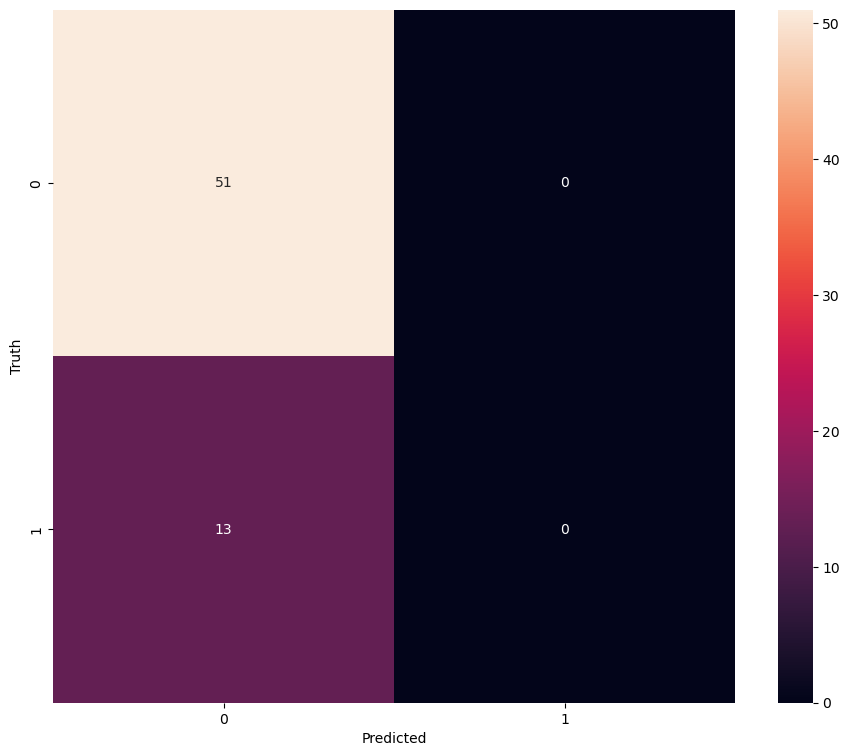

In [96]:
import seaborn as sn
plt.figure(figsize = (11, 9))
sn.heatmap(cm, annot= True, fmt= 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

we might want to create a prediction function

In [98]:

X_test.shape

(64, 12)

In [101]:
X[:5]

array([[ 3.6000e+01,  1.0000e+00,  8.0353e-02,  4.2638e-01,  5.4715e-01,
         2.7368e-01,  3.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,
         2.0000e+00,  2.0000e+00],
       [ 4.3000e+01,  1.0000e+00, -4.2032e-01,  5.7807e-01,  6.1447e-01,
        -3.1505e-02,  2.0000e+00,  3.0000e+00,  1.0000e+00,  1.0000e+00,
         2.0000e+00,  3.0000e+00],
       [ 6.9000e+01,  1.0000e+00,  2.1398e-01,  1.3114e+00, -3.2747e-01,
        -2.3426e-01,  3.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,
         2.0000e+00,  1.0000e+00],
       [ 5.6000e+01,  1.0000e+00,  3.4509e-01, -2.1147e-01, -1.9304e-01,
         1.2427e-01,  2.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,
         2.0000e+00,  2.0000e+00],
       [ 5.6000e+01,  1.0000e+00,  2.2155e-01,  1.9068e+00,  5.2045e-01,
        -3.1199e-01,  2.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,
         2.0000e+00,  1.0000e+00]])

In [105]:
def predict_survival(age, gender, p1, p2,  p3, p4, ts, Histology, er, pr, her2, st):
    features = [[age, gender, p1, p2,  p3, p4, ts, Histology, er, pr, her2, st]]

    pred = model.predict(features)[0]

    if pred == 1:
        print("Alive")
    else:
        print("Dead")


In [106]:
predict_survival(36, 1, 0.080353, 0.42638, 0.54715, 0.273680, 3, 1, 1 , 1, 2, 2)

Alive


export model to pickle file

In [107]:
import pickle
with open("cancer.pickel", "wb") as f:
    pickle.dump(model, f)